In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

##### Load image

In [2]:
original_image = cv2.imread('forest.jpg', cv2.IMREAD_GRAYSCALE)

##### Display image

(-0.5, 707.5, 467.5, -0.5)

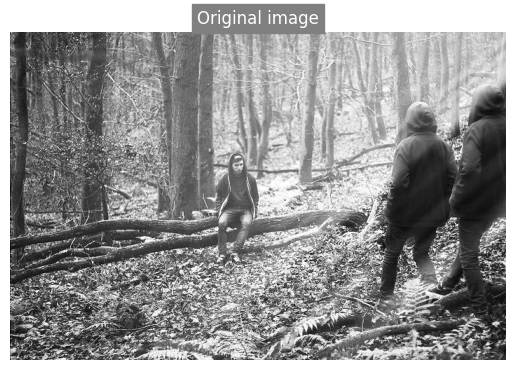

In [3]:
plt.title('Original image', color='white', backgroundcolor='grey')
plt.imshow(original_image, cmap = 'gray')
plt.axis('off')

##### Define fourier transform function

In [4]:
def fourier_transform(image):
    _fft = np.fft.fft2(image)
    # shift zero-frequency component to the center  
    fourier_image = np.fft.fftshift(_fft)
    return fourier_image

##### Define inverse fourier transform function

In [5]:
def inverse_fourier_trans(fourier_image):
    centered_image = np.fft.ifftshift(fourier_image)
    inverse_fourier = np.fft.ifft2(centered_image)
    return inverse_fourier

In [6]:
def plot_fourier_trans(original_image, fourier_image):
    # calculate log scaled magnitude of the image
    magnitude = np.abs(fourier_image)
    log_magnitude = np.log(magnitude + 1)
    
    # calculate the phase of the image
    phase = np.angle(fourier_image)

    # Plot
    #fig = plt.figure(figsize=(15, 10))
    #gs = fig.add_gridspec(1, 4)

    # Original transform
    #ax2 = fig.add_subplot(gs[0, 0])
    # ax2.imshow(original_image, cmap='gray')
    # ax2.set_title('Original image', color='white', backgroundcolor='grey')

    # Fourier transform
    #ax2 = fig.add_subplot(gs[0, 1])
    # ax2.imshow(magnitude, cmap='gray')
    # ax2.set_title('Magnitude image', color='white', backgroundcolor='grey')

    # Log scaled magnitude
    #ax2 = fig.add_subplot(gs[0, 2])
    # ax2.imshow(log_magnitude, cmap='gray')
    # ax2.set_title('Log scaled magnitude', color='white', backgroundcolor='grey')

    # Phase
    #ax2 = fig.add_subplot(gs[0, 3])
    # ax2.imshow(phase, cmap='gray')
    # ax2.set_title('Phase', color='white', backgroundcolor='grey')

    plt.imshow(original_image, cmap='gray')
    plt.title('Original image', color='white', backgroundcolor='grey')
    plt.show()

    # Fourier transform
    #ax2 = fig.add_subplot(gs[0, 1])
    plt.imshow(magnitude, cmap='gray')
    plt.title('Magnitude image', color='white', backgroundcolor='grey')
    plt.show()

    # Log scaled magnitude
    #ax2 = fig.add_subplot(gs[0, 2])
    plt.imshow(log_magnitude, cmap='gray')
    plt.title('Log scaled magnitude', color='white', backgroundcolor='grey')
    plt.show()

    # Phase
    #ax2 = fig.add_subplot(gs[0, 3])
    plt.imshow(phase, cmap='gray')
    plt.title('Phase', color='white', backgroundcolor='grey')
    plt.show()

##### Display results

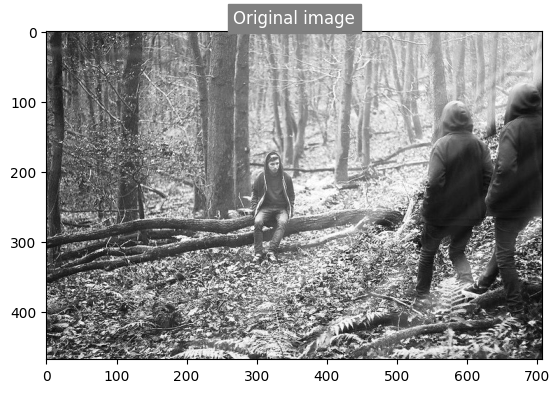

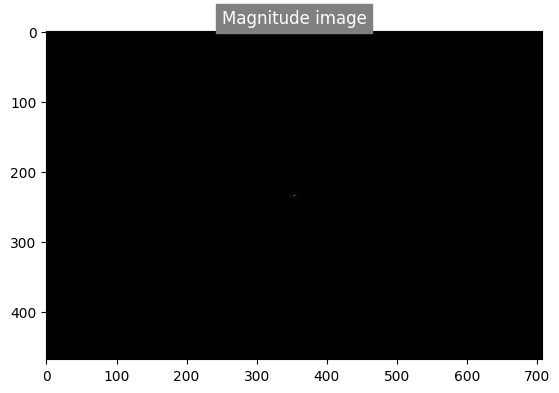

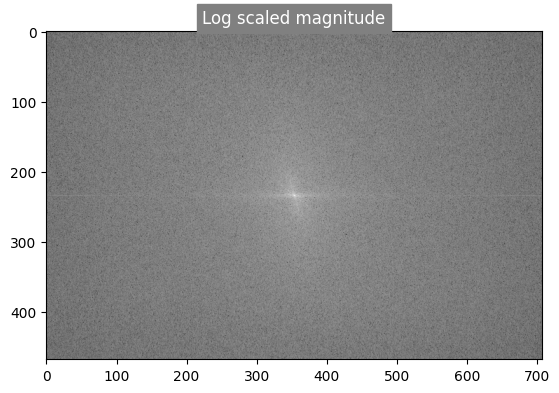

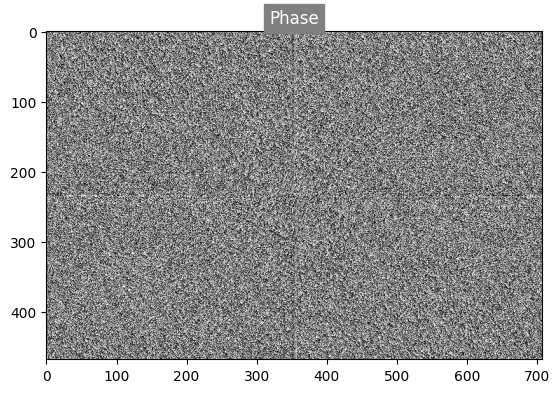

In [7]:
fourier_image = fourier_transform(original_image)
plot_fourier_trans(original_image, fourier_image)

In [8]:
print(fourier_image.shape)

(468, 708)


#### The function to calculate the distance between u and v:

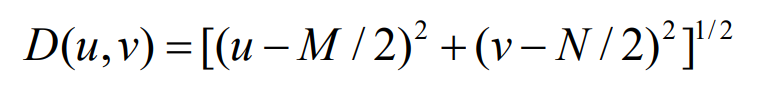

In [9]:
# Calculate D(u, v)
def D_uv(u, v, shape):
    M, N = shape[0], shape[1]
    return math.sqrt(math.pow((u - M//2), 2) + math.pow((v - N//2), 2))

#### Ideal Low pass filter

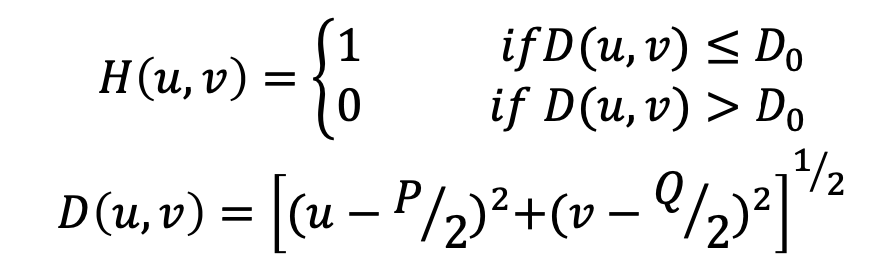

#### Butterworth Low pass filter

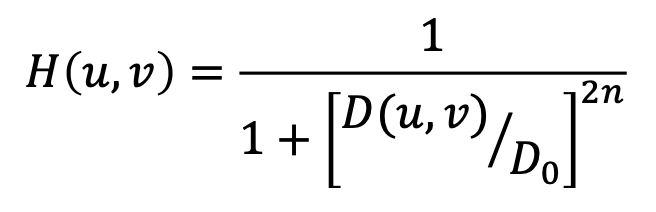

#### Gaussian Low pass filter

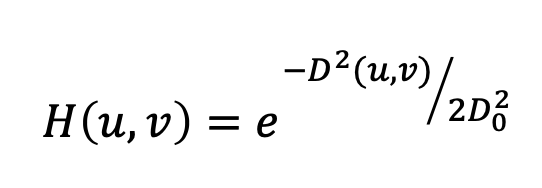

#### Filter design

In [10]:
def apply_filters(original_image, filter_type, cutoff_fre, n=None):
    shape = original_image.shape
    filter = np.zeros(shape, dtype=np.float32)
    complement = np.ones(shape)

    # detect filter type
    if 'ideal' in filter_type:
        for i in range(shape[0]):
            for j in range(shape[1]):
                filter[i, j] = 0 if D_uv(i, j, shape) >= cutoff_fre else 1
    elif 'butterworth' in filter_type:
        for i in range(shape[0]):
            for j in range(shape[1]):
                filter[i, j] = 1/(1 + math.pow((D_uv(i, j, shape)/cutoff_fre), 2*n))

    elif 'gaussian' in filter_type:
        for i in range(shape[0]):
            for j in range(shape[1]):
                filter[i, j] =  math.exp(-math.pow(D_uv(i, j, shape), 2) / (2 * math.pow(cutoff_fre, 2)))

    # high-pass or low-pass
    if 'LP' in filter_type:
        return filter
    else:
        return complement - filter

#### Low-pass filters

In [11]:
# Apply filter on original image and then multiple with fourier image
# radius = 50
ideal_50 = apply_filters(original_image, 'LP_ideal', 50) * fourier_image
bw_50 = apply_filters(original_image, 'LP_butterworth', 50, n=2) * fourier_image
gaussian_50 = apply_filters(original_image, 'LP_gaussian', 50) * fourier_image

# radius = 100
ideal_100 = apply_filters(original_image, 'LP_ideal', 100) * fourier_image
bw_100 = apply_filters(original_image, 'LP_butterworth', 100, n=2) * fourier_image
gaussian_100 = apply_filters(original_image, 'LP_gaussian', 100) * fourier_image

# radius = 200
ideal_200 = apply_filters(original_image, 'LP_ideal', 200) * fourier_image
bw_200 = apply_filters(original_image, 'LP_butterworth', 200, n=2) * fourier_image
gaussian_200 = apply_filters(original_image, 'LP_gaussian', 200) * fourier_image

#### Apply filter to images

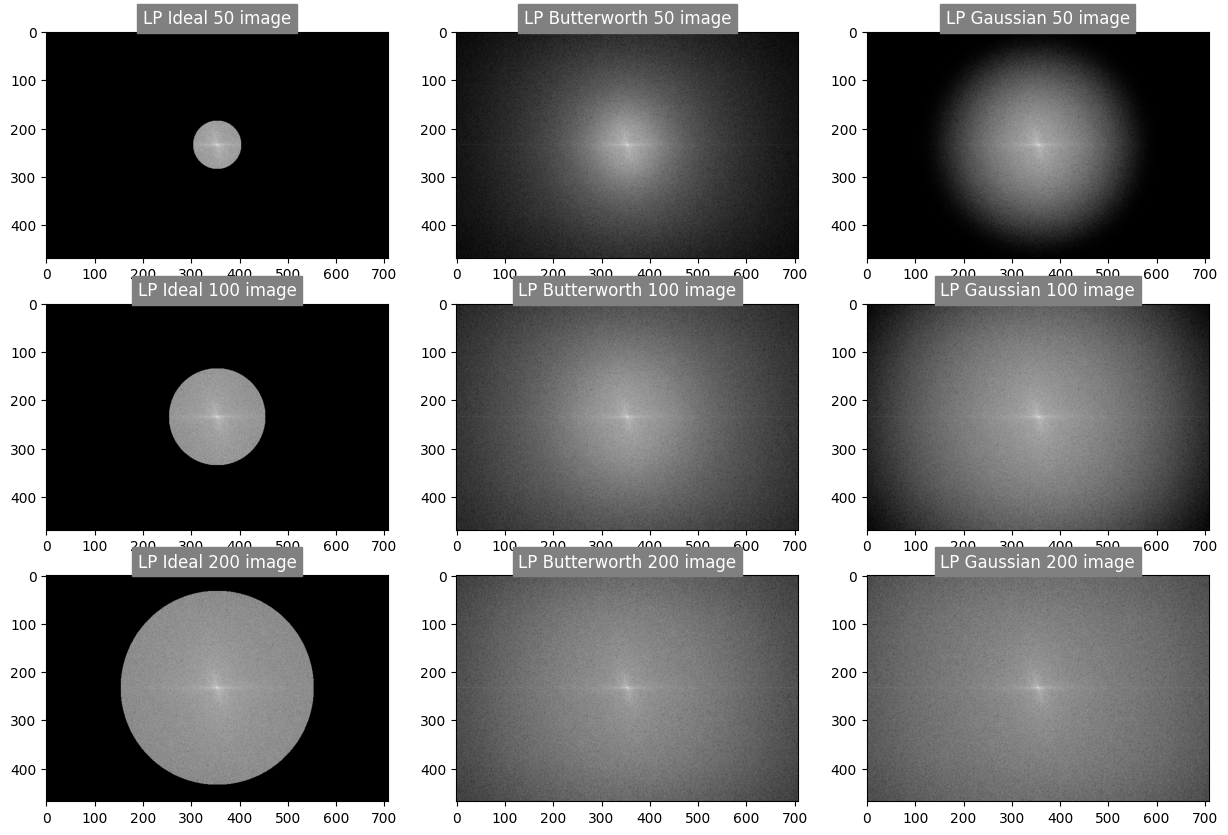

In [12]:
def log_abs(img):
    '''
    :param img: the image to be transformed
    :return the log scaled magnitude of the image
    '''
    magnitude = np.abs(img)
    log_magnitude = np.log(magnitude + 1)
    return log_magnitude

# Plot
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 3)

############### radius = 50
# LP ideal 
ax2 = fig.add_subplot(gs[0, 0])
ax2.imshow(log_abs(ideal_50), cmap='gray')
ax2.set_title('LP Ideal 50 image', color='white', backgroundcolor='grey')

# LP butterworth 
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(log_abs(bw_50), cmap='gray')
ax2.set_title('LP Butterworth 50 image', color='white', backgroundcolor='grey')

# LP gaussian
ax2 = fig.add_subplot(gs[0, 2])
ax2.imshow(log_abs(gaussian_50), cmap='gray')
ax2.set_title('LP Gaussian 50 image', color='white', backgroundcolor='grey')

############### radius = 100
# LP ideal 
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(log_abs(ideal_100), cmap='gray')
ax2.set_title('LP Ideal 100 image', color='white', backgroundcolor='grey')

# LP butterworth 
ax2 = fig.add_subplot(gs[1, 1])
ax2.imshow(log_abs(bw_100), cmap='gray')
ax2.set_title('LP Butterworth 100 image', color='white', backgroundcolor='grey')

# LP gaussian
ax2 = fig.add_subplot(gs[1, 2])
ax2.imshow(log_abs(gaussian_100), cmap='gray')
ax2.set_title('LP Gaussian 100 image', color='white', backgroundcolor='grey')

############### radius = 200
# LP ideal 
ax2 = fig.add_subplot(gs[2, 0])
ax2.imshow(log_abs(ideal_200), cmap='gray')
ax2.set_title('LP Ideal 200 image', color='white', backgroundcolor='grey')

# LP butterworth 
ax2 = fig.add_subplot(gs[2, 1])
ax2.imshow(log_abs(bw_200), cmap='gray')
ax2.set_title('LP Butterworth 200 image', color='white', backgroundcolor='grey')

# LP gaussian
ax2 = fig.add_subplot(gs[2, 2])
ax2.imshow(log_abs(gaussian_200), cmap='gray')
ax2.set_title('LP Gaussian 200 image', color='white', backgroundcolor='grey')

plt.show()

#### Apply inverse fourier transform to images

In [13]:
ideal_50_image = np.abs(inverse_fourier_trans(ideal_50))
bw_50_image = np.abs(inverse_fourier_trans(bw_50))
gaussian_50_image = np.abs(inverse_fourier_trans(gaussian_50))

ideal_100_image = np.abs(inverse_fourier_trans(ideal_100))
bw_100_image = np.abs(inverse_fourier_trans(bw_100))
gaussian_100_image = np.abs(inverse_fourier_trans(gaussian_100))

ideal_200_image = np.abs(inverse_fourier_trans(ideal_200))
bw_200_image = np.abs(inverse_fourier_trans(bw_200))
gaussian_200_image = np.abs(inverse_fourier_trans(gaussian_200))

##### Display results

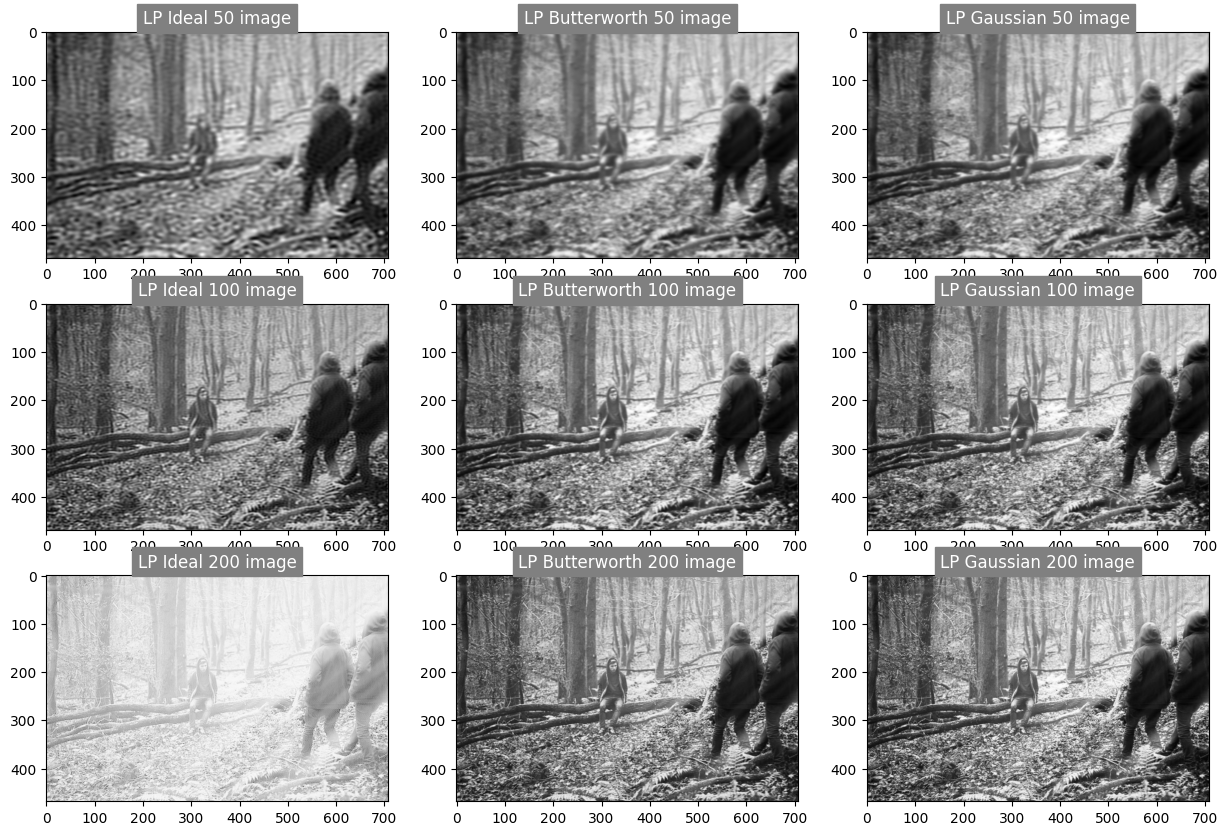

In [14]:
# Plot
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 3)

############### radius = 50
# LP ideal 
ax2 = fig.add_subplot(gs[0, 0])
ax2.imshow(ideal_50_image, cmap='gray')
ax2.set_title('LP Ideal 50 image', color='white', backgroundcolor='grey')

# LP butterworth 
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(bw_50_image, cmap='gray')
ax2.set_title('LP Butterworth 50 image', color='white', backgroundcolor='grey')

# LP gaussian
ax2 = fig.add_subplot(gs[0, 2])
ax2.imshow(gaussian_50_image, cmap='gray')
ax2.set_title('LP Gaussian 50 image', color='white', backgroundcolor='grey')

############### radius = 100
# LP ideal 
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(ideal_100_image, cmap='gray')
ax2.set_title('LP Ideal 100 image', color='white', backgroundcolor='grey')

# LP butterworth 
ax2 = fig.add_subplot(gs[1, 1])
ax2.imshow(bw_100_image, cmap='gray')
ax2.set_title('LP Butterworth 100 image', color='white', backgroundcolor='grey')

# LP gaussian
ax2 = fig.add_subplot(gs[1, 2])
ax2.imshow(gaussian_100_image, cmap='gray')
ax2.set_title('LP Gaussian 100 image', color='white', backgroundcolor='grey')

############### radius = 200
# LP ideal 
ax2 = fig.add_subplot(gs[2, 0])
ax2.imshow(log_abs(ideal_200_image), cmap='gray')
ax2.set_title('LP Ideal 200 image', color='white', backgroundcolor='grey')

# LP butterworth 
ax2 = fig.add_subplot(gs[2, 1])
ax2.imshow(bw_200_image, cmap='gray')
ax2.set_title('LP Butterworth 200 image', color='white', backgroundcolor='grey')

# LP gaussian
ax2 = fig.add_subplot(gs[2, 2])
ax2.imshow(gaussian_200_image, cmap='gray')
ax2.set_title('LP Gaussian 200 image', color='white', backgroundcolor='grey')

plt.show()

#### High-pass filters

In [15]:
# radius = 50
ideal_50 = apply_filters(original_image, 'HP_ideal', 50)*fourier_image
bw_50 = apply_filters(original_image, 'HP_butterworth', 50, n=2)*fourier_image
gaussian_50 = apply_filters(original_image, 'HP_gaussian', 50)*fourier_image

# radius = 100
ideal_100 = apply_filters(original_image, 'HP_ideal', 100)*fourier_image
bw_100 = apply_filters(original_image, 'HP_butterworth', 100, n=2)*fourier_image
gaussian_100 = apply_filters(original_image, 'HP_gaussian', 100)*fourier_image

# radius = 200
ideal_200 = apply_filters(original_image, 'HP_ideal', 200)*fourier_image
bw_200 = apply_filters(original_image, 'HP_butterworth', 200, n=2)*fourier_image
gaussian_200 = apply_filters(original_image, 'HP_gaussian', 200)*fourier_image

#### Apply filters to images

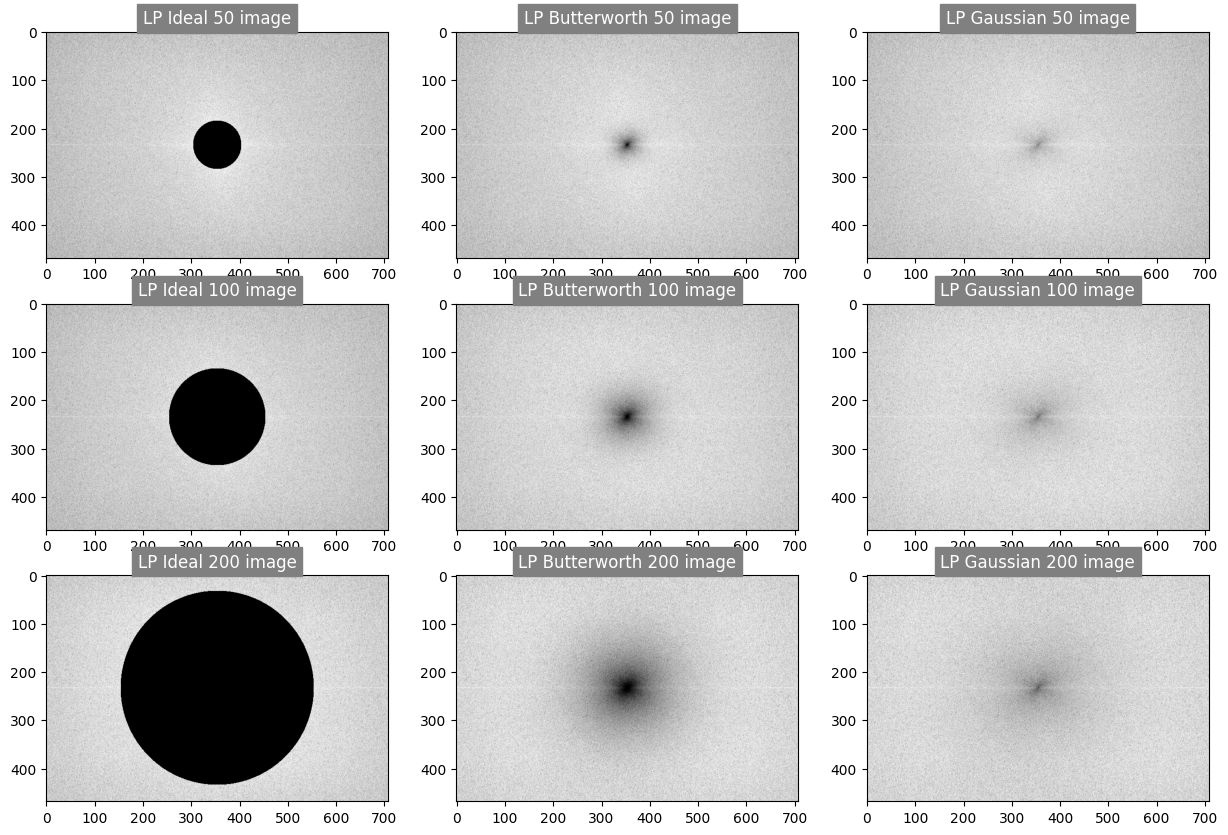

In [16]:
def log_abs(img):
    '''
    :param img: the image to be transformed
    :return the log scaled magnitude of the image
    '''
    magnitude = np.abs(img)
    log_magnitude = np.log(magnitude + 1)
    return log_magnitude

# Plot
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 3)

############### radius = 50
# LP ideal 
ax2 = fig.add_subplot(gs[0, 0])
ax2.imshow(log_abs(ideal_50), cmap='gray')
ax2.set_title('LP Ideal 50 image', color='white', backgroundcolor='grey')

# LP butterworth 
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(log_abs(bw_50), cmap='gray')
ax2.set_title('LP Butterworth 50 image', color='white', backgroundcolor='grey')

# LP gaussian
ax2 = fig.add_subplot(gs[0, 2])
ax2.imshow(log_abs(gaussian_50), cmap='gray')
ax2.set_title('LP Gaussian 50 image', color='white', backgroundcolor='grey')

############### radius = 100
# LP ideal 
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(log_abs(ideal_100), cmap='gray')
ax2.set_title('LP Ideal 100 image', color='white', backgroundcolor='grey')

# LP butterworth 
ax2 = fig.add_subplot(gs[1, 1])
ax2.imshow(log_abs(bw_100), cmap='gray')
ax2.set_title('LP Butterworth 100 image', color='white', backgroundcolor='grey')

# LP gaussian
ax2 = fig.add_subplot(gs[1, 2])
ax2.imshow(log_abs(gaussian_100), cmap='gray')
ax2.set_title('LP Gaussian 100 image', color='white', backgroundcolor='grey')

############### radius = 200
# LP ideal 
ax2 = fig.add_subplot(gs[2, 0])
ax2.imshow(log_abs(ideal_200), cmap='gray')
ax2.set_title('LP Ideal 200 image', color='white', backgroundcolor='grey')

# LP butterworth 
ax2 = fig.add_subplot(gs[2, 1])
ax2.imshow(log_abs(bw_200), cmap='gray')
ax2.set_title('LP Butterworth 200 image', color='white', backgroundcolor='grey')

# LP gaussian
ax2 = fig.add_subplot(gs[2, 2])
ax2.imshow(log_abs(gaussian_200), cmap='gray')
ax2.set_title('LP Gaussian 200 image', color='white', backgroundcolor='grey')

plt.show()

#### Inverse Fourier Transform

In [17]:
ideal_50_image = np.abs(inverse_fourier_trans(ideal_50))
bw_50_image = np.abs(inverse_fourier_trans(bw_50))
gaussian_50_image = np.abs(inverse_fourier_trans(gaussian_50))

ideal_100_image = np.abs(inverse_fourier_trans(ideal_100))
bw_100_image = np.abs(inverse_fourier_trans(bw_100))
gaussian_100_image = np.abs(inverse_fourier_trans(gaussian_100))

ideal_200_image = np.abs(inverse_fourier_trans(ideal_200))
bw_200_image = np.abs(inverse_fourier_trans(bw_200))
gaussian_200_image = np.abs(inverse_fourier_trans(gaussian_200))

##### Display results

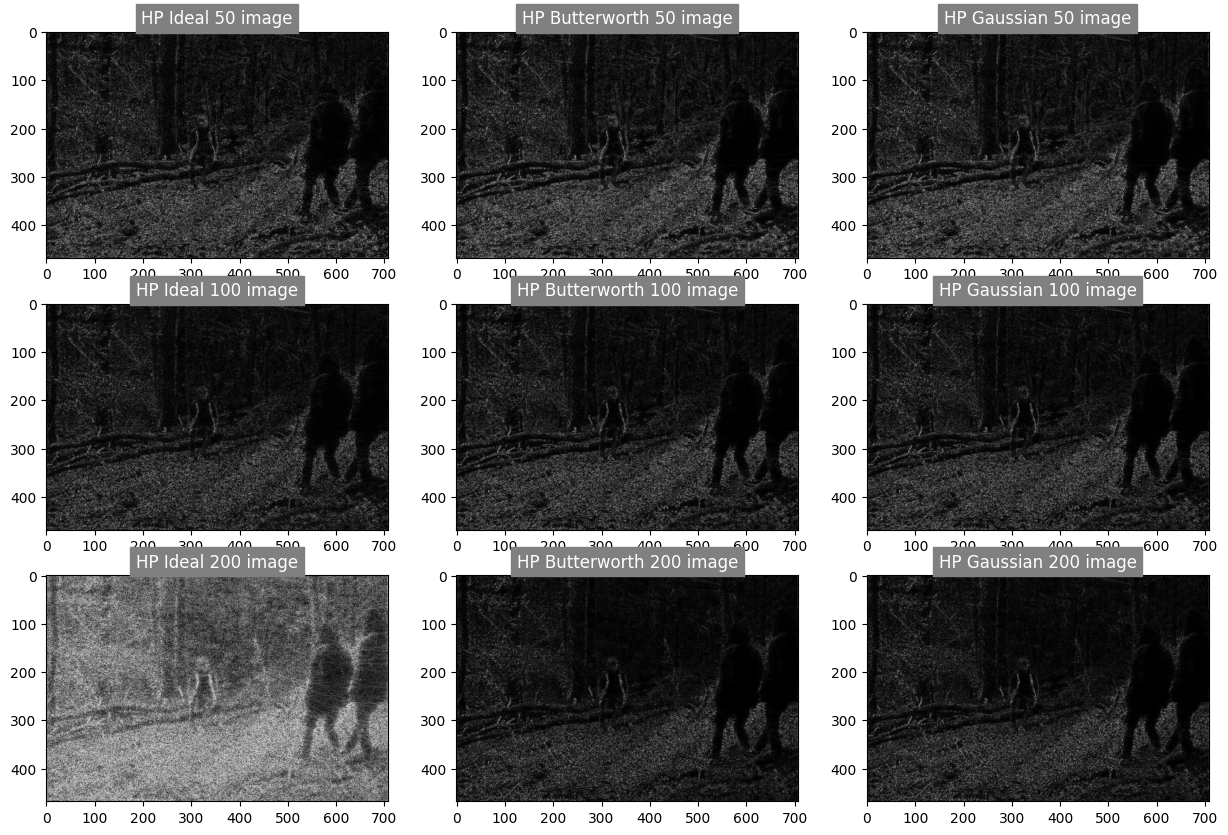

In [18]:
# Plot
fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(3, 3)

############### radius = 50
# LP ideal 
ax2 = fig.add_subplot(gs[0, 0])
ax2.imshow(ideal_50_image, cmap='gray')
ax2.set_title('HP Ideal 50 image', color='white', backgroundcolor='grey')

# LP butterworth 
ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(bw_50_image, cmap='gray')
ax2.set_title('HP Butterworth 50 image', color='white', backgroundcolor='grey')

# LP gaussian
ax2 = fig.add_subplot(gs[0, 2])
ax2.imshow(gaussian_50_image, cmap='gray')
ax2.set_title('HP Gaussian 50 image', color='white', backgroundcolor='grey')

############### radius = 100
# LP ideal 
ax2 = fig.add_subplot(gs[1, 0])
ax2.imshow(ideal_100_image, cmap='gray')
ax2.set_title('HP Ideal 100 image', color='white', backgroundcolor='grey')

# LP butterworth 
ax2 = fig.add_subplot(gs[1, 1])
ax2.imshow(bw_100_image, cmap='gray')
ax2.set_title('HP Butterworth 100 image', color='white', backgroundcolor='grey')

# LP gaussian
ax2 = fig.add_subplot(gs[1, 2])
ax2.imshow(gaussian_100_image, cmap='gray')
ax2.set_title('HP Gaussian 100 image', color='white', backgroundcolor='grey')

############### radius = 200
# LP ideal 
ax2 = fig.add_subplot(gs[2, 0])
ax2.imshow(log_abs(ideal_200_image), cmap='gray')
ax2.set_title('HP Ideal 200 image', color='white', backgroundcolor='grey')

# LP butterworth 
ax2 = fig.add_subplot(gs[2, 1])
ax2.imshow(bw_200_image, cmap='gray')
ax2.set_title('HP Butterworth 200 image', color='white', backgroundcolor='grey')

# LP gaussian
ax2 = fig.add_subplot(gs[2, 2])
ax2.imshow(gaussian_200_image, cmap='gray')
ax2.set_title('HP Gaussian 200 image', color='white', backgroundcolor='grey')

plt.show()